In [ ]:
import pandas as pd

# Load the data from the CSV file
file_path = '/mnt/part-00000-e74d3bea-3d4d-431d-a132-b046f5c501c3-c000.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head(7), data.columns

(  station_id  dayofweek  hour  start_count  end_count  bike_availability_diff
 0        NaN          0     0            0          1                      -1
 1        NaN          0     0            0          1                      -1
 2        NaN          0     0            0          1                      -1
 3        NaN          0     0            0          1                      -1
 4        NaN          0     0            0          1                      -1
 5    2733.03          1     1            1          6                      -5
 6    2733.03          1     3            1          3                      -2,
 Index(['station_id', 'dayofweek', 'hour', 'start_count', 'end_count',
        'bike_availability_diff'],
       dtype='object'))

In [ ]:
data = data.dropna()
print(data)

       station_id  dayofweek  hour  start_count  end_count  \
5         2733.03          1     1            1          6   
6         2733.03          1     3            1          3   
7         2733.03          1     4            1          2   
8         2733.03          1    13           40         36   
9         2733.03          1    15           35         18   
...           ...        ...   ...          ...        ...   
366951     SYS038          3    23            2         12   
366953     SYS038          4    14            2         25   
366954     SYS038          4    23            1         14   
366957     SYS038          5    15            1         20   
366963     SYS039          5    12            6          6   

        bike_availability_diff  
5                           -5  
6                           -2  
7                           -1  
8                            4  
9                           17  
...                        ...  
366951                  

In [ ]:

# Define a function to categorize hours
def categorize_hour(hour):
    if 0 <= hour <= 4:
        return 'night'
    elif 5 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 16:
        return 'afternoon'
    elif 17 <= hour <= 23:
        return 'evening'
    else:
        return 'unknown'  # just in case there are any out-of-bounds values

# Apply the hour categorization
data['time_category'] = data['hour'].apply(categorize_hour)

# Group by station_id, dayofweek, and time_category, and calculate the mean of the other columns
aggregated_data = data.groupby(['station_id', 'dayofweek', 'time_category']).agg({
    'start_count': 'mean',
    'end_count': 'mean',
    'bike_availability_diff': 'mean'
}).reset_index()

# Show the first few rows of the aggregated data
aggregated_data.head()

,station_id,dayofweek,time_category,start_count,end_count,bike_availability_diff
0,2733.03,1,afternoon,28.400000,26.600000,1.800000
1,2733.03,1,evening,18.428571,19.714286,-1.285714
2,2733.03,1,morning,6.666667,9.333333,-2.666667
3,2733.03,1,night,1.200000,4.400000,-3.200000
4,2733.03,2,afternoon,18.200000,18.800000,-0.600000


<ipython-input-15-4448e9546a12>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(aggregated_data, x='start_count', y='time_category', inner='box', palette='Dark2')


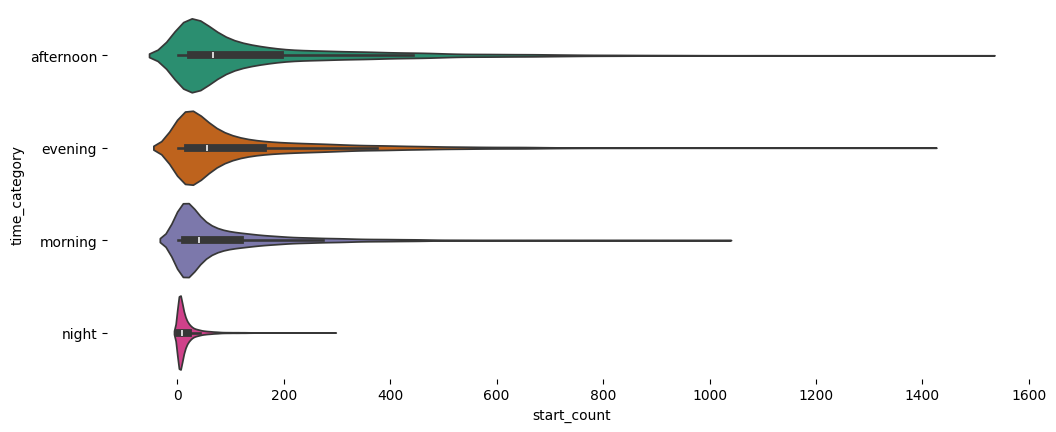

In [ ]:
# @title time_category vs start_count

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(aggregated_data['time_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggregated_data, x='start_count', y='time_category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-14-580465352bdd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(aggregated_data, x='bike_availability_diff', y='time_category', inner='box', palette='Dark2')


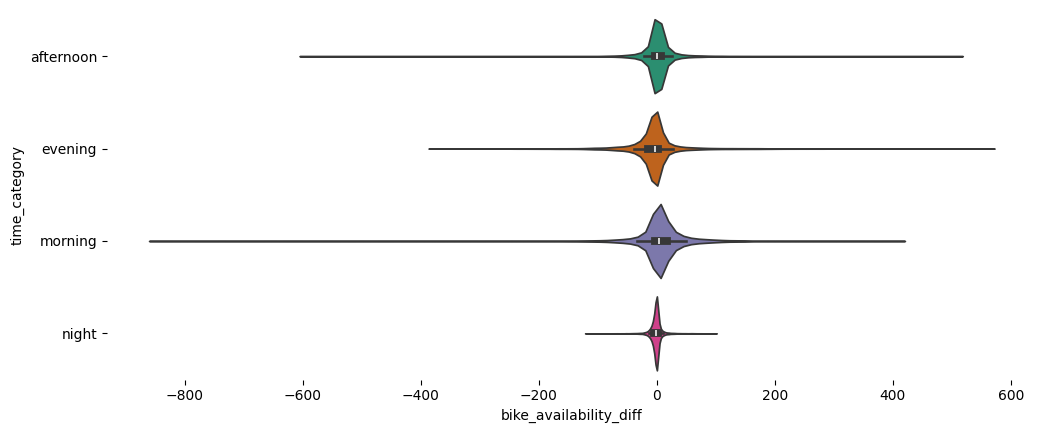

In [ ]:
# @title time_category vs bike_availability_diff

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(aggregated_data['time_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggregated_data, x='bike_availability_diff', y='time_category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

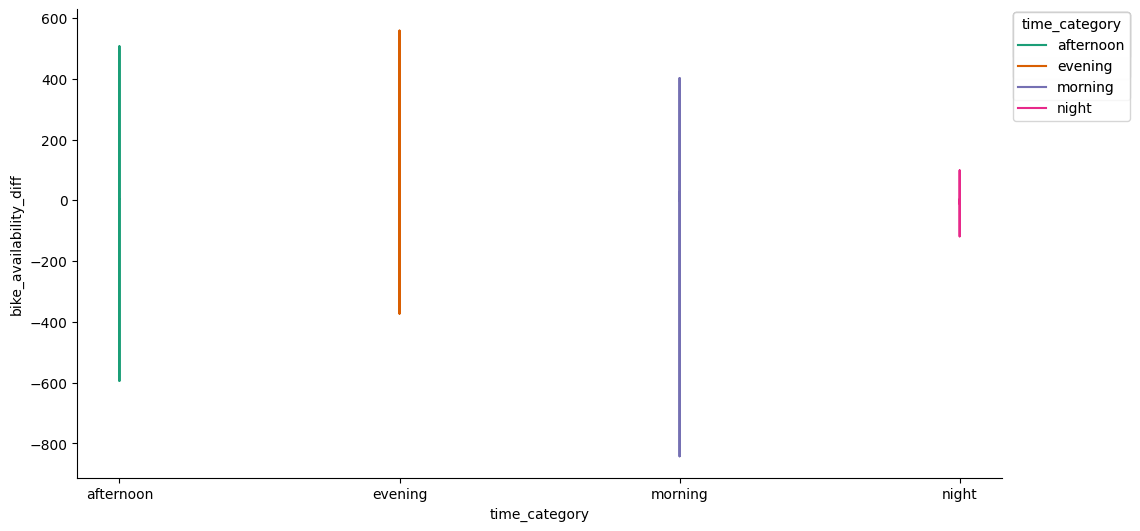

In [ ]:
# @title time_category vs bike_availability_diff

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_category']
  ys = series['bike_availability_diff']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = aggregated_data.sort_values('time_category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_category')
_ = plt.ylabel('bike_availability_diff')

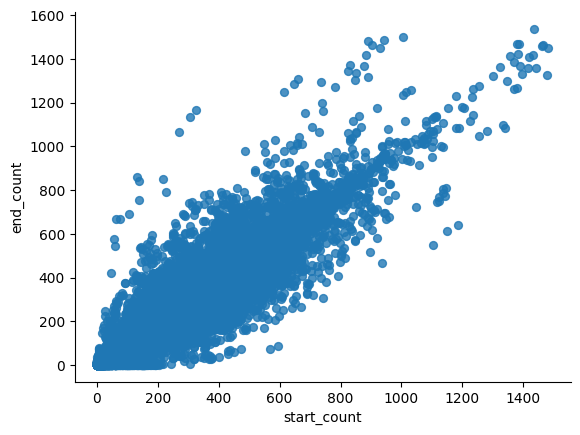

In [ ]:
# @title start_count vs end_count

from matplotlib import pyplot as plt
aggregated_data.plot(kind='scatter', x='start_count', y='end_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

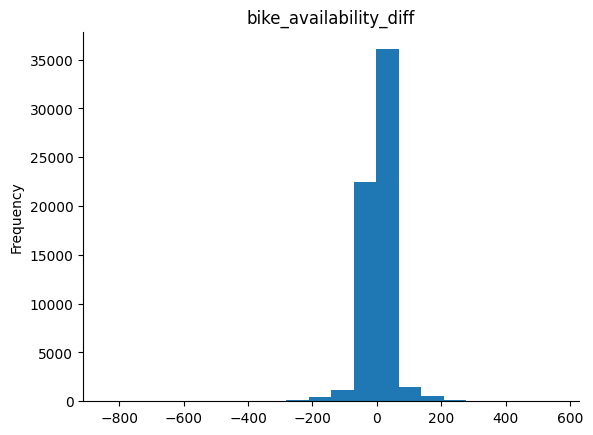

In [ ]:
# @title bike_availability_diff

from matplotlib import pyplot as plt
aggregated_data['bike_availability_diff'].plot(kind='hist', bins=20, title='bike_availability_diff')
plt.gca().spines[['top', 'right',]].set_visible(False)

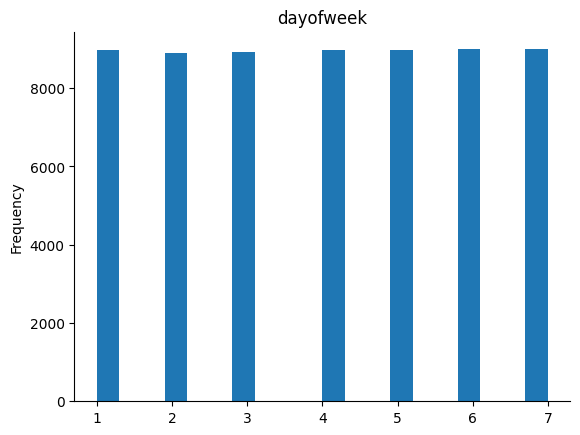

In [ ]:
# @title dayofweek

from matplotlib import pyplot as plt
aggregated_data['dayofweek'].plot(kind='hist', bins=20, title='dayofweek')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Define the path for the output CSV file
output_path = '/mnt/aggregated_bike_data.csv'

# Write the aggregated data to a CSV file
aggregated_data.to_csv(output_path, index=False)

In [ ]:
import pandas as pd
from datetime import datetime


# Load the data from the CSV file
file_path = '/mnt/aggregated_bike_data.csv'
data = pd.read_csv(file_path)

def get_bike_availability_diff(station_id, datetime_str, data):
    # Convert datetime string to dayofweek and time_category
    dt = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
    # Extract the day of the week (Monday=1, Sunday=7)
    dayofweek = dt.weekday() + 1
    hour = dt.hour
    if 0 <= hour <= 4:
        time_category = 'night'
    elif 5 <= hour <= 11:
        time_category = 'morning'
    elif 12 <= hour <= 16:
        time_category = 'afternoon'
    elif 17 <= hour <= 23:
        time_category = 'evening'
    else:
        return None  # Return None if the hour doesn't fit any category

    # Filter the data for the given station_id, dayofweek, and time_category
    result = data[(data['station_id'] == station_id) &
                  (data['dayofweek'] == dayofweek) &
                  (data['time_category'] == time_category)]

    # Check if there's a corresponding entry in the DataFrame
    if not result.empty:
        # Assuming bike_availability_diff is averaged or similarly aggregated, if multiple, return the first
        return result.iloc[0]['bike_availability_diff']
    else:
        return None  # Return None if no data is found

# Example usage:
# Load your data into a DataFrame 'data'

print(get_bike_availability_diff('5329.03', '2024-05-06 12:45:00', data))



-41.2
